# Normalisation

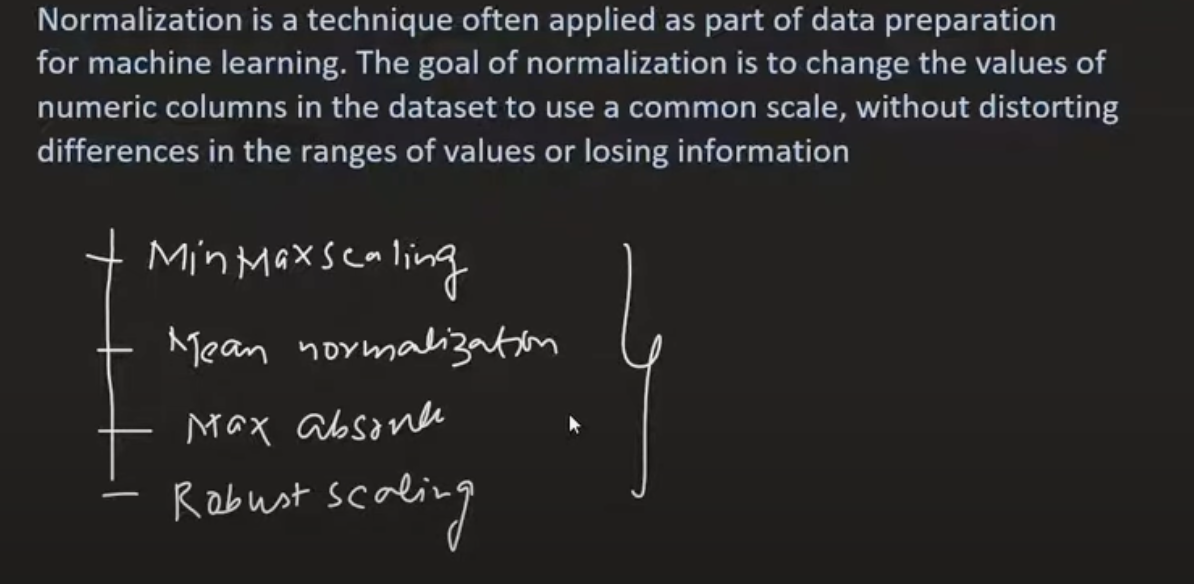

## 1. Min Max Scaling
After min-max scaling, the transformed range will be [0,1].
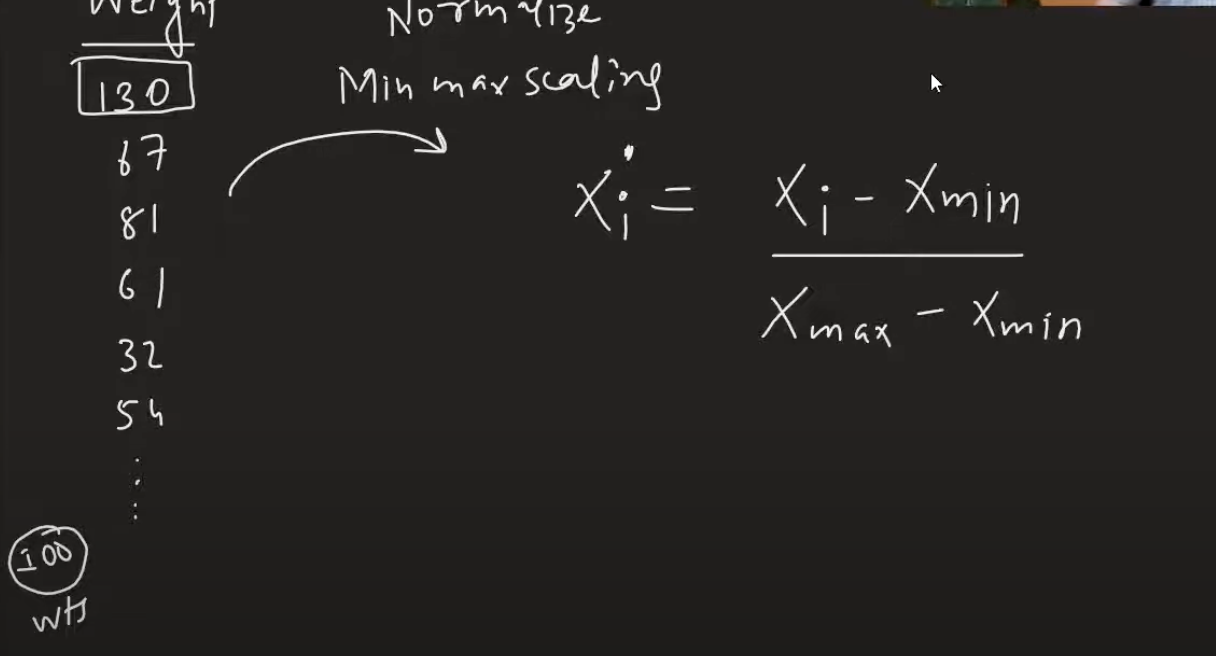

## Geometric Intuition

The main purpose of mix-max scaling is that it will squeeze the entire graph into unit dimesnion
For example:
- 2d: unit rectangle
- 3d: unit cube

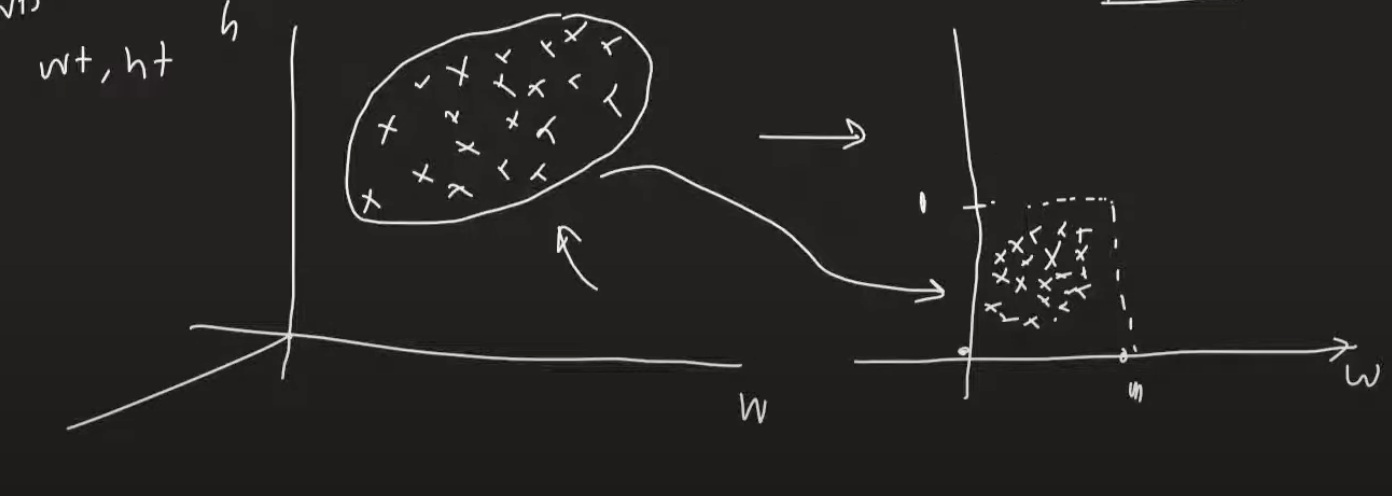

# Example code

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Wine_data.csv", header = None, usecols = [0, 1, 2])
df.columns = ["Class label", "Alcohol", "Malic acid"]

In [5]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


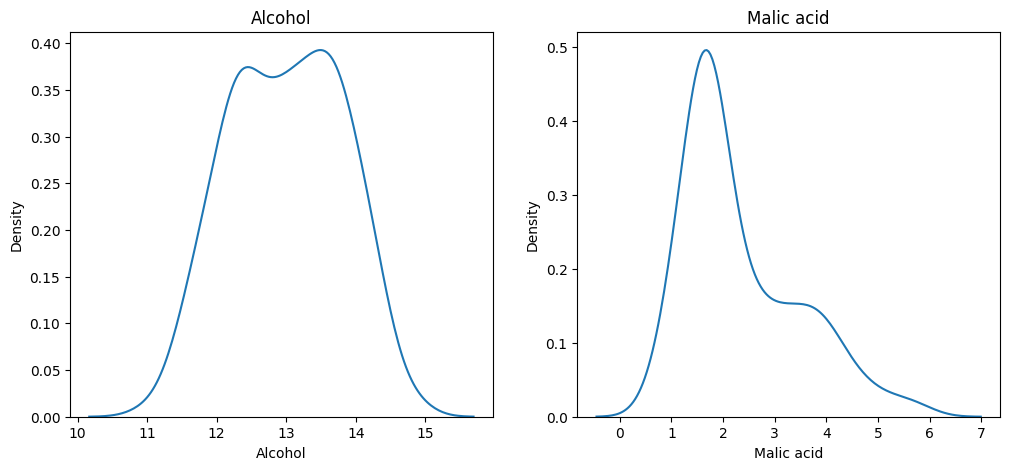

In [9]:
# Alcohol PDF
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ax1.set_title("Alcohol")
sns.kdeplot(df["Alcohol"], ax = ax1)

ax2.set_title("Malic acid")
sns.kdeplot(df["Malic acid"], ax = ax2)

plt.show()

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

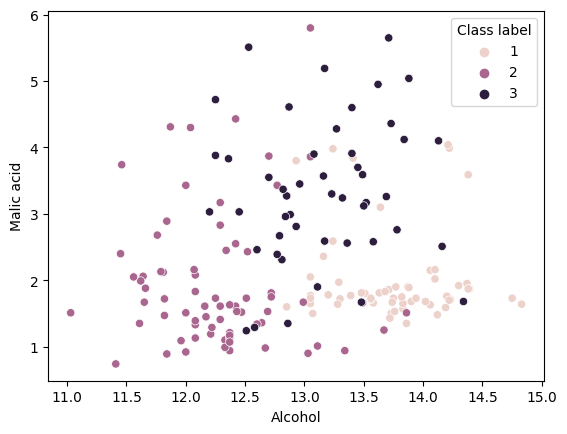

In [14]:
sns.scatterplot(x = df["Alcohol"], y = df["Malic acid"], hue = df["Class label"])

# Train test split
Before scaling we need to split the data. Thats the good practice

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop("Class label", axis = 1),
                                                   df["Class label"],
                                                    test_size = 0.3,
                                                    random_state = 0)

In [59]:
X_train.shape, X_test.shape

((124, 2), (54, 2))

# Scaling data

In [60]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the data
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_train.columns)

In [62]:
X_train_scaled.shape, X_test_scaled.shape

((124, 2), (54, 2))

In [63]:
np.round(X_train.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [64]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


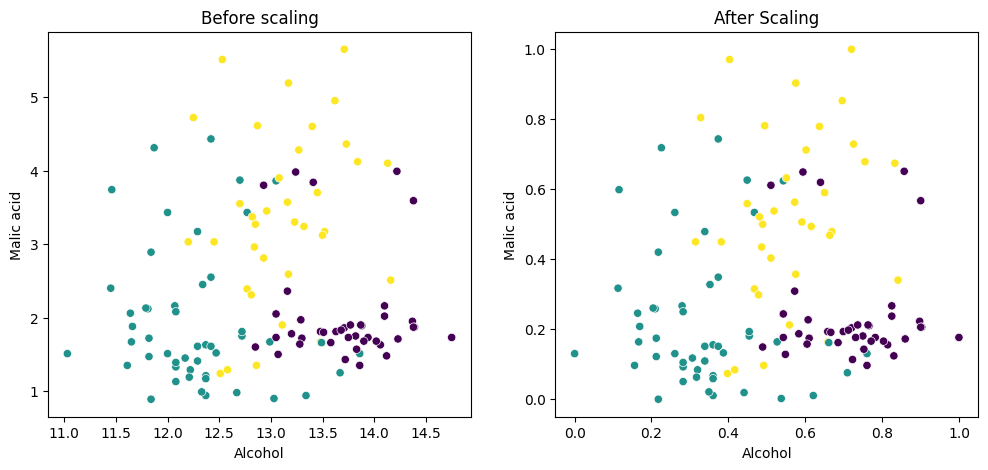

In [71]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ax1.set_title("Before scaling")
sns.scatterplot(x = X_train["Alcohol"], y = X_train["Malic acid"], c = y_train, ax = ax1)

ax2.set_title("After Scaling")


sns.scatterplot(x = X_train_scaled["Alcohol"], y = X_train_scaled["Malic acid"],
                c = y_train, ax = ax2)
plt.show()



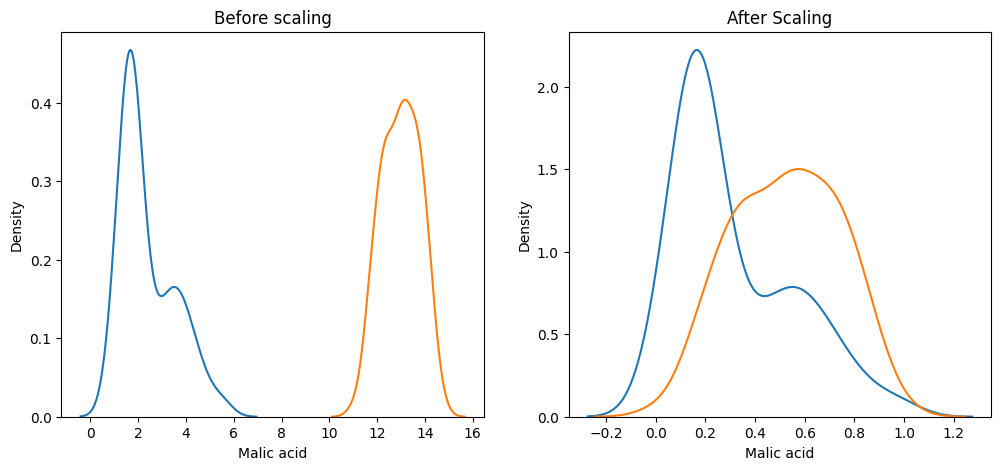

In [74]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ax1.set_title("Before scaling")
sns.kdeplot( X_train["Malic acid"], ax = ax1)
sns.kdeplot( X_train["Alcohol"], ax = ax1)

ax2.set_title("After Scaling")

sns.kdeplot( X_train_scaled["Malic acid"], ax = ax2)
sns.kdeplot( X_train_scaled["Alcohol"], ax = ax2)
plt.show()

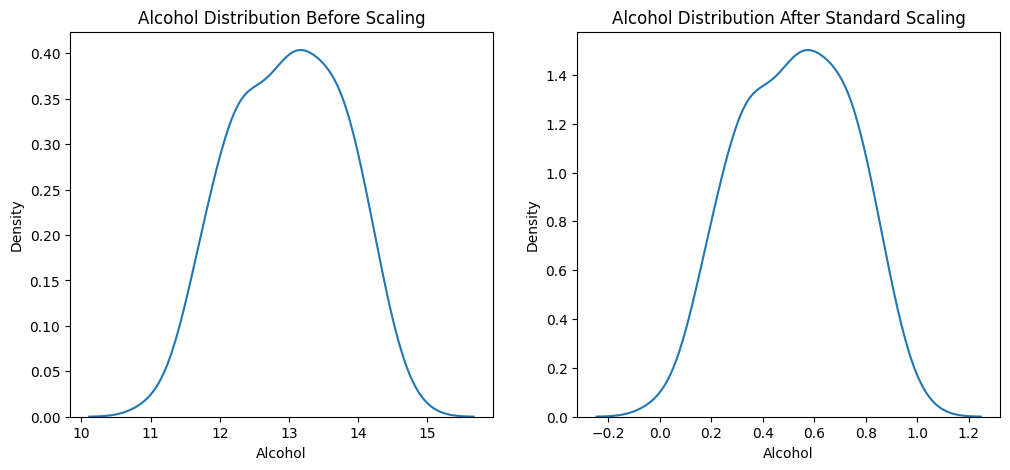

In [75]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

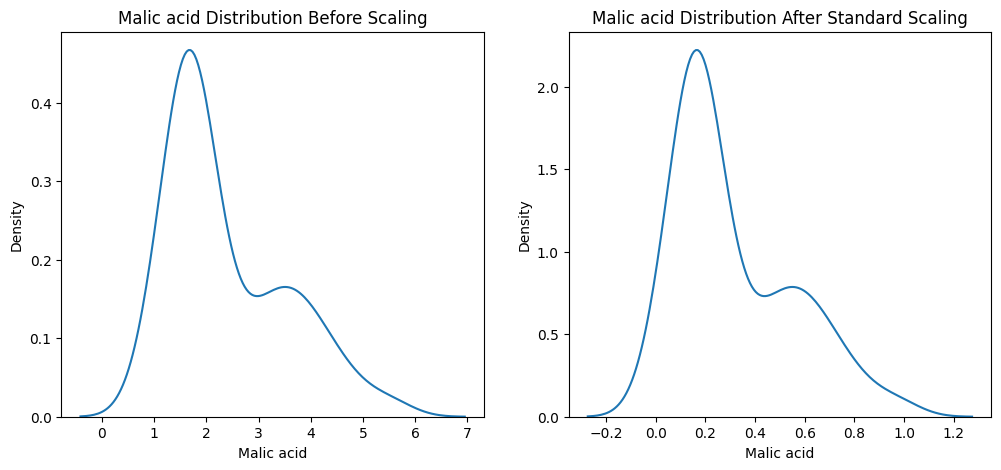

In [76]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

The summary of min-max scaling:
- It is not at all necessary that the shape of the distribution will remain the same.
- Effect of outlier decreases


## 2. Mean Normalisation

- In this method we do mean centering. 
- The range will be from [-1, 1].
- There is no class for this in Sklearn
- This is mainly used for centering data.

## Formula

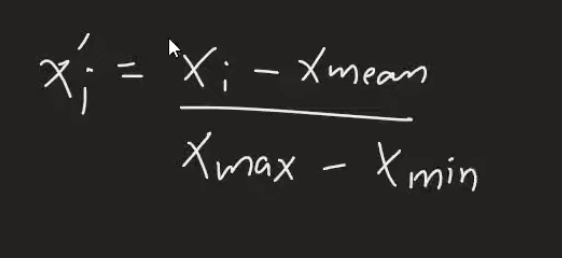

## Geometric Intution

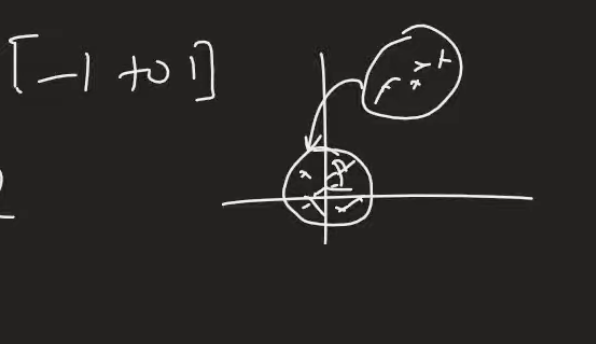


# 3. MaxAbsScaling

- There is class MaxAbsScaler in sklearn
- This is mainly used in sparse data, Sparse data is the data where we have lots of zeros.


## Formula
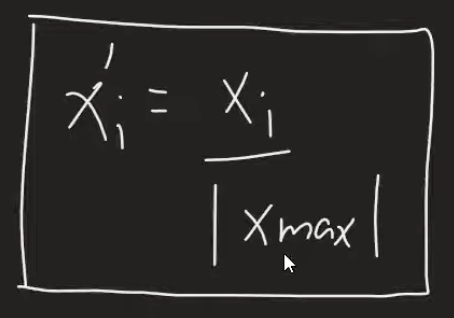

## 4. Robust Scaling

- There is class RobustScaler in sklearn
- This is mainly used when there is lot of outliers, This scaler is robust to outliers.

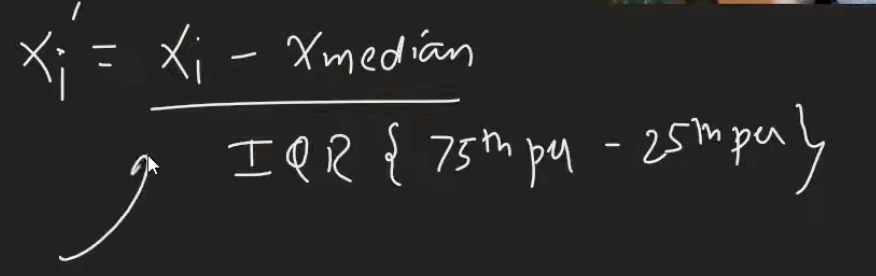

# Normalisation VS Standardization

- 1. Is feature scaling is necessary?
In General, We need to understand this wether scaling is necessary or not. Like for decision tree scaling is not required.
- 2. What to use?

Generally, in 90 percent of the case standardsiation is used most of the time. 

Min-max scaling : When we know the range of the values like for image. pixel value will be in range always [0, 255]. In this case min-max scaling is good.
